In [1]:
from sklearn.cluster import KMeans
import numpy as np
import scipy
import sys
sys.path.append('../corv/src')

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from tqdm import tqdm
import pandas as pd
import corv

### Query
from astroquery.sdss import SDSS
from astroquery.gaia import Gaia
from astropy import constants as c
import data_selector as ds

could not find pickled WD models
using local paths
star and exposure catalogs not found! check paths and run make_catalogs() if you want to use sdss functionality. otherwise ignore.


In [2]:
catalog = ds.get_catalog('data/catalog_sdss4.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 38.88it/s]


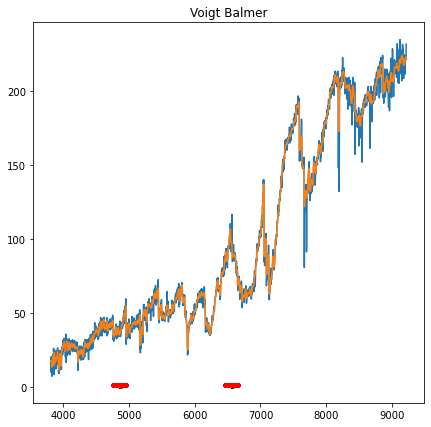

In [4]:
i  = 9
n = 1

wl_new = np.linspace(4000, 8000, 8000)

wd_pos = [1,2,1,1,2,1,2,2,2,2,2,2,2]
ms_pos = [2,1,2,2,1,2,1,1,1,1,1,1,1]

plt.figure(figsize = (7, 7))
corvmodel = corv.models.make_balmer_model(names = ['a','b'])
params = corvmodel.make_params()
nwl, nfl = corv.models.get_normalized_model(wl_new, corvmodel, params)
plt.plot(nwl, nfl, 'k.')
params['RV'].set(value = 1000)
nwl, nfl = corv.models.get_normalized_model(wl_new, corvmodel, params)
plt.plot(nwl, nfl, 'r.')
plt.plot(catalog['wavelength{}'.format(n)][i], catalog['flux{}'.format(n)][i])
plt.plot(catalog['wavelength{}'.format(n)][i], scipy.ndimage.median_filter(catalog['flux{}'.format(n)][i], 11))
plt.title('Voigt Balmer')
plt.show()


  0%|                                                                                           | 0/14 [00:00<?, ?it/s]C:\Users\arsen\AppData\Local\Temp/ipykernel_4284/90385093.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
  0%|                                                                                           | 0/14 [00:05<?, ?it/s]


<Parameter 'RV', value=-29.411687345959763, bounds=[-2500:2500]>


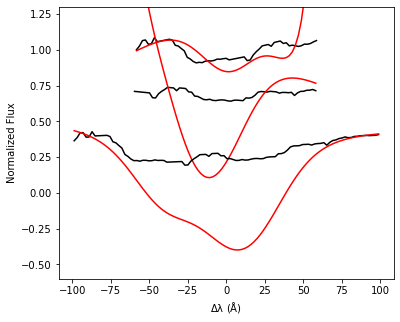

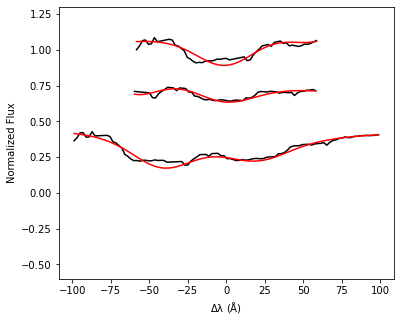

In [29]:
ms_pos = [2,1,2,2,1,2,1,1,1,1,1,1,1,1]
i  = 2

for i in tqdm(range(len(ms_pos))):
    i = 0
    
    wl = catalog['wavelength{}'.format(ms_pos[i])][i]
    fl = catalog['flux{}'.format(ms_pos[i])][i]
    pl_fl = scipy.ndimage.median_filter(catalog['flux{}'.format(ms_pos[i])][i], 11)
    ivar = catalog['ivar{}'.format(ms_pos[i])][i]
    
    corvmodel = corv.models.make_balmer_model(nvoigt = 2, centres = dict(a = 8462.5, b = 8524, c = 8503.001 ), 
                                              windows = dict(a = 60, b = 60, c = 100),
                                              edges = dict(a = 100, b = 25, c = 10),
                                              names = ['a','b','c'])
    params = corvmodel.make_params()
    
    param_res, rv_res, rv_init = corv.fit.fit_corv(wl, fl, ivar, corvmodel)
    
    #print(param_res.success)
    #print(param_res.redchi)
    
    f = corv.utils.lineplot(wl, pl_fl, ivar, corvmodel, params, printparams = False)
    f = corv.utils.lineplot(wl, pl_fl, ivar, corvmodel, param_res.params, printparams = False)
    f.show()
    print(param_res.params['RV'])
    
    break